<a href="https://colab.research.google.com/github/EmilianoLS/DiTellaML/blob/main/Deep%20Learning/Practica_2_Estudiantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2: Introducción a PyTorch

## a) Calculando el gradiente mediante Autograd

En primer lugar, vamos a calcular del gradiente para el perceptrón simple con función de activación sigmoidea que vimos en la teoría. Pero esta vez, en lugar de realizar manualmente el proceso de backpropagation, vamos a usar el módulo `autograd` de PyTorch.

La función $f(x, w)$ a la cual queremos encontrarle el gradiente es:

> $f(\mathbf{x}, \mathbf{w}) = \frac{1}{1 + e^{-(w_0 x_0 + w_1 x_1 + w_2)}}$

Definimos entonces la función utilizando `torch.tensor` (recordar usar el parámetro `requires_grad = True` para que PyTorch guarde los gradientes) y realizamos la pasada "forward" para los siguientes valores de x y w:

> $\mathbf{x} = (-1, -2)$

> $\mathbf{w} = (2, -3, -3)$



In [3]:
import torch

# Declaro los tensores x y w
x = torch.tensor([-1.,-2.], requires_grad = True)
w = torch.tensor([2.,-3., -3.], requires_grad = True)

# Defino la funcion sinusoide
f = 1/(1 + torch.exp(-(w[0]*x[0] + w[1]*x[1] + w[2])))

print(f)


tensor(0.7311, grad_fn=<MulBackward0>)


Ahora, utilizando la función `f.backward()` computamos los gradientes $\frac{\partial f}{ \partial \mathbf{x}}$ y $\frac{\partial f}{ \partial \mathbf{w}}$

In [4]:
f.backward()

In [5]:
print("Gradiente df/dx = " + str(x.grad))
print("Gradiente df/dw = " + str(w.grad))

Gradiente df/dx = tensor([ 0.3932, -0.5898])
Gradiente df/dw = tensor([-0.1966, -0.3932,  0.1966])


## b) Minimizando una función con Gradient Descent

Ahora, vamos a implementar usar el algorítmo de gradiente descendiente (utilizando Autograd para computar el gradiente) para minimizar la función cuadrática $$f(x) = 2x^2 + x + 4$$

Utilizaremos la implementación `torch.optim.SGD` de gradiente descendiente.



X = tensor([-1.], requires_grad=True), f(x) = tensor([5.], grad_fn=<AddBackward0>)
X = tensor([-0.9970], requires_grad=True), f(x) = tensor([4.9910], grad_fn=<AddBackward0>)
X = tensor([-0.9940], requires_grad=True), f(x) = tensor([4.9821], grad_fn=<AddBackward0>)
X = tensor([-0.9910], requires_grad=True), f(x) = tensor([4.9733], grad_fn=<AddBackward0>)
X = tensor([-0.9881], requires_grad=True), f(x) = tensor([4.9645], grad_fn=<AddBackward0>)
X = tensor([-0.9851], requires_grad=True), f(x) = tensor([4.9558], grad_fn=<AddBackward0>)
X = tensor([-0.9822], requires_grad=True), f(x) = tensor([4.9472], grad_fn=<AddBackward0>)
X = tensor([-0.9793], requires_grad=True), f(x) = tensor([4.9386], grad_fn=<AddBackward0>)
X = tensor([-0.9763], requires_grad=True), f(x) = tensor([4.9301], grad_fn=<AddBackward0>)
X = tensor([-0.9734], requires_grad=True), f(x) = tensor([4.9217], grad_fn=<AddBackward0>)
X = tensor([-0.9705], requires_grad=True), f(x) = tensor([4.9133], grad_fn=<AddBackward0>)
X = ten

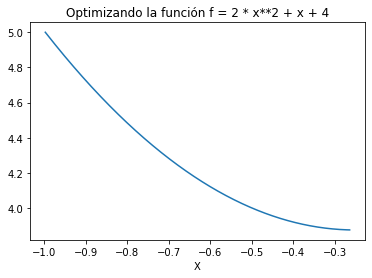

In [6]:
import matplotlib.pyplot as plt

# Definir la variable que será el parámetro a optimizar
x = torch.tensor([-1.], requires_grad = True)

# Definir el optimizador, indicando el parámetro a optimizar y el learning rate
optimizer = torch.optim.SGD([x], lr = 0.001)

# Acumuladores que usaremos para guardar los valores sucesivos de x, y
f_values = []
x_values = []

# Loop de optimización
for i in range(1000):

    # Setemos en 0 los gradientes de todos los elementos
    optimizer.zero_grad()
       
    # Pasada forward: ejecutar la función a minimizar
    f = 2 * x ** 2 + x + 4

    print("X = " + str(x) + ", f(x) = " + str(f))

    # Pasada backward: computar los gradientes
    f.backward()

    # Actualizar los pesos dando un paso de gradiente descendiente
    optimizer.step()

    # Guardar los valores para luego plotearlos
    f_values.append(f.data.item())
    x_values.append(x.data.item())

# Ploteo los valores
plt.title("Optimizando la función f = 2 * x**2 + x + 4")
plt.xlabel("X")
plt.plot(x_values,f_values)


# c) Implementando un MLP en PyTorch para predicción de precios de inmuebles 

Contamos con una base de datos de 506 precios de inmuebles de la ciudad de Boston [1]. Cada inmueble está descripto por diversas características como el indice de crimen per capita en la zona, o el grado de accesibilidad a autopistas, etc. Se cuenta con el precio de cada uno, y se pretende desarrollar un módulo que permita predecir dicho precio a partir de las características.

[1]: *Hedonic prices and the demand for clean air*, J. Environ. Economics & Management, vol.5, 81-102, 1978.

Primero, vamos a generar un histograma de los precios con todos los datos disponibles:

El dataset contiene dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename']) 


Fila de ejemplo:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]


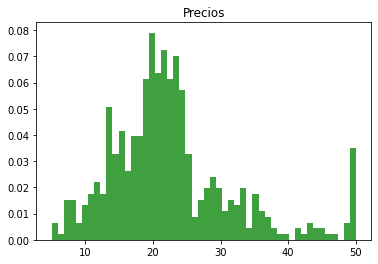

In [7]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

# Importamos el dataset

dataset_boston = load_boston()

print("El dataset contiene " + str(dataset_boston.keys()) + " \n\n")

# Extraigo los datos (features) y los precios (etiquetas a predecir)
data = dataset_boston['data']
data = data.astype(np.float32)
precios = np.expand_dims(dataset_boston['target'], axis=1).astype(np.float32)

print("Fila de ejemplo:")
print(dataset_boston['feature_names'])
print(data[0,:])

# Dibujo un histograma de los precios de los inmuebles
_ = plt.hist(precios, 50, density=True, facecolor='g', alpha=0.75)
_ = plt.title("Precios")


Particionamos los datos en entrenamiento y prueba usando la función `sklearn.model_selection.train_test_split`

In [8]:
 from sklearn.model_selection import train_test_split
 
 # Particiono los datos en entrenamiento y prueba usando el método de scikitlearn
 X_train, X_test, y_train, y_test = train_test_split(data, precios, test_size=0.33, random_state=42)

Ahora implementaremos un Perceptrón multicapa que usaremos para como regresor del precio utilizando PyTorch (ejemplo basado en el curso de [RPI](https://rpi.analyticsdojo.com/)).

El perceptrón deberá contar con 3 capas:
- Las dos primeras con 100 neuronas, y deberán usar la función de activación ReLU.
- La última con una única neurona cuya salida sea un valor escalar que corresponda al precio estimado del inmueble, que no deberá utilizar ninguna función de activación.

Algunas clases de PyTorch que resultarán útiles para implementar el modelo, son:
- `torch.nn.Linear`: Implementa una capa totalmente conectada. Es necesario especificarle el número de parámetros de entrada y de salida.
- `torch.nn.functional.relu`: Implementa la función de activación ReLU.

Además, utilizaremos el optimizador `torch.optim.Adam` y la función de pérdida `torch.nn.MSELoss` (error cuadrático medio).






Epoch 100, loss = 78.0603
Epoch 200, loss = 58.4464
Epoch 300, loss = 27.5199
Epoch 400, loss = 86.5409
Epoch 500, loss = 63.6162
Epoch 600, loss = 84.6948
Epoch 700, loss = 21.996
Epoch 800, loss = 39.2295
Epoch 900, loss = 43.3506
Epoch 1000, loss = 16.1896
Epoch 1100, loss = 60.6044
Epoch 1200, loss = 16.0363
Epoch 1300, loss = 45.8108
Epoch 1400, loss = 38.7219
Epoch 1500, loss = 15.0999
Epoch 1600, loss = 12.1788
Epoch 1700, loss = 60.9465
Epoch 1800, loss = 39.5071
Epoch 1900, loss = 30.2152
Epoch 2000, loss = 29.5433
Epoch 2100, loss = 35.4681
Epoch 2200, loss = 10.9484
Epoch 2300, loss = 10.421
Epoch 2400, loss = 15.8413
Epoch 2500, loss = 23.3227
Epoch 2600, loss = 34.6991
Epoch 2700, loss = 44.0373
Epoch 2800, loss = 57.1572
Epoch 2900, loss = 14.8989
Epoch 3000, loss = 16.2745
Epoch 3100, loss = 18.0626
Epoch 3200, loss = 26.6653
Epoch 3300, loss = 28.8516
Epoch 3400, loss = 20.7228
Epoch 3500, loss = 18.8463
Epoch 3600, loss = 18.9556
Epoch 3700, loss = 36.0902
Epoch 3800, 

Text(0.5, 1.0, 'Función de pérdida durante el entrenamiento')

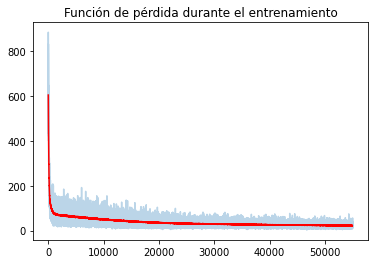

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# Tamaño del batch de entrenamiento
batch_size = 50

# Tasa de aprendizaje inicial para el gradiente descendente
learning_rate = 0.00001

class Net(torch.nn.Module):
    def __init__(self, input_features, size_hidden, n_output):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(input_features, size_hidden) # First layer
        self.hidden2 = nn.Linear(size_hidden, size_hidden)    # Second layer
        self.out = nn.Linear(size_hidden, n_output)           # Output layer

    def forward(self, x):
        x = F.relu(self.hidden1(x))      # activation function for hidden layer linear output
        x = F.relu(self.hidden2(x))
        x = self.out(x)
        return x

# Definimos el modelo del perceptrón
# Establezco el tamaño de entrada a la red (cantidad de features entrantes)
input_size = len(dataset_boston['feature_names'])
net = Net(input_size, 100 , 1)

# Construimos el optimizador, y le indicamos que los parámetros a optimizar 
# son los del modelo definido: net.parameters()

optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# Definimos también la función de pérdida a utilizar
criterion = torch.nn.MSELoss()

# Creamos el objeto dataset que empaqueta los array de numpy para que puedan 
# ser leidos por PyTorch
dataset = TensorDataset(torch.from_numpy(X_train).clone(), torch.from_numpy(y_train).clone())

# Creamos un loader iterable indicandole que debe leer los datos a partir de
# del dataset creado en el paso anterior. Este objeto puede ser iterado
# y nos devuelve de a un batch (x, y).
loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)

# Número de épocas
num_epochs = 5000

# Lista en la que iremos guardando el valor de la función de pérdida en cada 
# etapa de entrenamiento
loss_list = []

# Bucle de entrenamiento
for i in range(num_epochs):

    # Itero sobre todos los batches del dataset
    for x, y in loader:
        # Seteo en cero los gradientes de los parámetros a optimizar
        optimizer.zero_grad()

        # Realizo la pasada forward computando la loss entre la salida de la red `net(x)` y las etiquetas `y`
        # Forward pass
        prediction = net(x)
        # Funcion de perdida
        loss = criterion(prediction, y)
        
        # Realizo la pasada backward por la red        
        loss.backward()
        
        # Actualizo los pesos de la red con el optimizador
        optimizer.step()

        # Me guardo el valor actual de la función de pérdida para luego graficarlo
        loss_list.append(loss.data.item())

    # Muestro el valor de la función de pérdida cada 100 iteraciones        
    if i > 0 and i % 100 == 0:
        print('Epoch %d, loss = %g' % (i, loss))

# Muestro la lista que contiene los valores de la función de pérdida
# y una versión suavizada (rojo) para observar la tendencia
plt.figure()
loss_np_array = np.array(loss_list)
plt.plot(loss_np_array, alpha = 0.3)
N = 60
running_avg_loss = np.convolve(loss_np_array, np.ones((N,))/N, mode='valid')
plt.plot(running_avg_loss, color='red')
plt.title("Función de pérdida durante el entrenamiento")


MSE medio en training: 21.942833
MSE medio en test: 21.646175


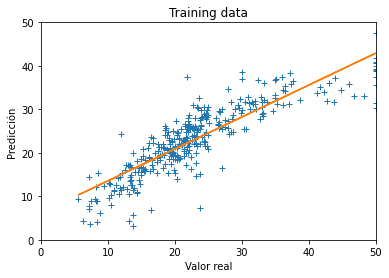

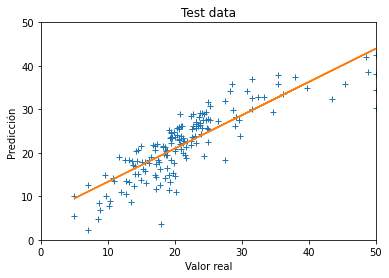

In [10]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm

# Definimos un método para mostrar las predicciones como un scatter plot 
# y graficamos la recta de regresión para esos datos.

def plotScatter(x_data, y_data, title, fit_line=True):
  plt.figure()
  
  plt.plot(x_data, y_data, '+')
  plt.xlabel('Valor real')
  plt.ylabel('Predicción')
  plt.ylim((0,50))
  plt.xlim((0,50))
  plt.title(title)

  if fit_line:
    X, Y = x_data.reshape(-1,1), y_data.reshape(-1,1)
    plt.plot( X, LinearRegression().fit(X, Y).predict(X) )

# Dibujamos el ground truth vs las predicciones en los datos de entrenamiento
py = net(torch.FloatTensor(X_train))
y_pred_train = py.cpu().detach().numpy()
plotScatter(y_train, y_pred_train, "Training data")

# Dibujamos el ground truth vs las predicciones en los datos de test
py = net(torch.FloatTensor(X_test))
y_pred_test = py.cpu().detach().numpy()
plotScatter(y_test, y_pred_test, "Test data")

print ("MSE medio en training: " + str(((y_train - y_pred_train)**2).mean()))
print ("MSE medio en test: " + str(((y_test - y_pred_test)**2).mean()))


# Entregable 
1. Encontrar el mínimo de la función *f* definida en el apartado b). Para ello, deberán encontrar primero la derivada *f'(x)* de forma analítica, y utilizarla para computar el mínimo de la función. Posteriormente, deberán corrobarar que el valor coincida con el que obtuvieron optimizando la función con gradiente descendiente. 

2. Compara el rendimiento de 3 perceptrones multicapa que varíen en la cantidad de neuronas en sus capas intermedia. Probar colocando 2, 10 y 200 neuronas en dichas capas, al entrenar los perceptrones durante 5000 épocas. Mostrar los resultados utilizando:

* los gráficos de dispersión con la recta de regresión
* el error medio en los datos de entrenamiento y test

  Analizar la relación entre dichos resultados y la cantidad de neuronas que posee el perceptrón.
 

## Encontrar el mínimo de la función f definida en el apartado b

### Parte A: Determinación analítica de la derivada

El primer paso es calcular analíticamente la derivada de la función definida anteriormente. Recordando, la función era: $$f(x) = 2x^2 + x + 4$$

Para poder hallar el mínimo de esta función de forma analítica es necesario calcular la derivada de la misma, para luego encontrar el valor de $x$ que hace que valga cero. Esto es así porque la derivada de una función se define como la pendiente de la recta tangente a $f(x)$ en el punto $x$. Siguiendo esta lógica, en un mínimo (o máximo) dicha pendiente será igual a cero.

La derivada de dicha función es: $$f'(x) = 4x + 1 $$

Determino el mínimo: $$ 0 = 4x + 1 $$ $$ -1 = 4x $$ $$ x = -1/4 $$

A continuación se demuestra gráficamente que el valor obtenido anteriormente corresponde al mínimo de la función original $f(x)$



In [11]:
import pandas as pd
import numpy as np

def function(input):

  return 2*input**2 + input + 4

input_values = []
out_values = []

for value in np.arange(-10, 10, 0.01):

  input_values.append(value)
  out_values.append(function(value))

dataset = pd.DataFrame({
    'input_values': input_values,
    'out_values': out_values
})

Text(0, 0.5, 'f(x)')

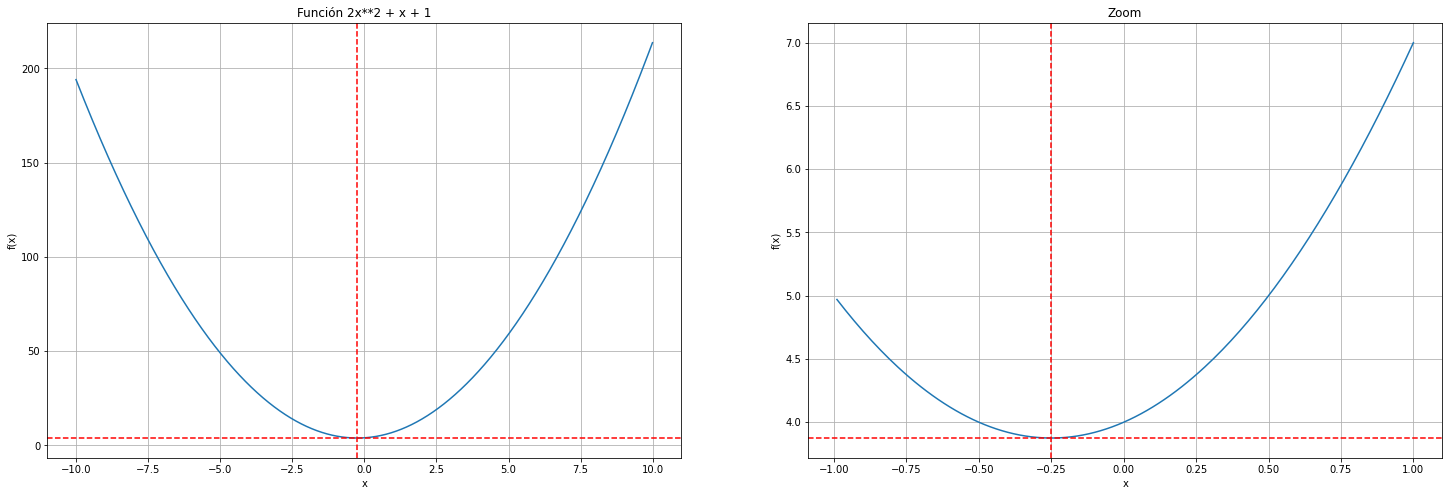

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (25,8))

# General plot
ax[0].plot(dataset['input_values'], dataset['out_values'])
ax[0].set_title('Función 2x**2 + x + 1')
ax[0].axvline(-1/4, c = 'r', linestyle = '--')
ax[0].axhline(function(-1/4), c = 'r', linestyle = '--')
ax[0].grid()
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')

# Zoomed in plot
ax[1].plot(dataset[(dataset['input_values'] >= -1) & (dataset['input_values'] <= 1)]['input_values'], 
           dataset[(dataset['input_values'] >= -1) & (dataset['input_values'] <= 1)]['out_values'])
ax[1].set_title('Zoom')
ax[1].axvline(-1/4, c = 'r', linestyle = '--')
ax[1].axhline(function(-1/4), c = 'r', linestyle = '--')
ax[1].grid()
ax[1].set_xlabel('x')
ax[1].set_ylabel('f(x)')


Los gráficos anteriores demuestran (analíticamente) cuál es el mínimo de la función definida.

Ahora si comparo el último valor obtenido durante el proceso de optimización mediante el método de gradiente descendiente vemos que el resultado no es exactamente el mismo, pero aún así es muy cercano.

In [13]:
print('Valor óptimo determinado por gradient descend:' , x_values[-1])

Valor óptimo determinado por gradient descend: -0.26362690329551697


Se observa que el resultado obtenido no es exactamente igual. Sin embargo, esto se debe principalmente a tres factores:

* El valor inicial a partir del cual se comienza a descender
* El número de iteraciones
* El learning rate

El valor inicial pre establecido fue de -1, bastante cercano al valor final de -0.25. Por lo tanto, si se agregan un número mayor de iteraciones, eventualmente se alcanzaría un valor más cercano al determinado analíticamente.
Adicionalmente, un learning rate menor incrementaría las probabilidades de obtener el mínimo global de la función.

**Nota**: Hay que aclarar que el método de gradiente descendiente no se utiliza para alcanzar el mínimo global (en nuestro ejemplo, un perfecto -0.25) sino que busca aproximarse lo más posible al mismo para garantizar que los parámetros calculados minimizan lo mayor posible la función de pérdida.



## Compara el rendimiento de 3 perceptrones multicapa que varíen en la cantidad de neuronas en sus capas intermedia.

In [18]:
def train_model(lr, hidden_size, epochs):

  # Tamaño del batch de entrenamiento
  batch_size = 50

  # Tasa de aprendizaje inicial para el gradiente descendente
  learning_rate = lr

  # Definimos el modelo del perceptrón
  # Establezco el tamaño de entrada a la red (cantidad de features entrantes)
  input_size = len(dataset_boston['feature_names'])
  net = Net(input_size, hidden_size , 1)

  # Construimos el optimizador, y le indicamos que los parámetros a optimizar 
  # son los del modelo definido: net.parameters()

  optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

  # Definimos también la función de pérdida a utilizar
  criterion = torch.nn.MSELoss()

  # Creamos el objeto dataset que empaqueta los array de numpy para que puedan 
  # ser leidos por PyTorch
  dataset = TensorDataset(torch.from_numpy(X_train).clone(), torch.from_numpy(y_train).clone())

  # Creamos un loader iterable indicandole que debe leer los datos a partir de
  # del dataset creado en el paso anterior. Este objeto puede ser iterado
  # y nos devuelve de a un batch (x, y).
  loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)

  # Número de épocas
  num_epochs = epochs


  # Lista en la que iremos guardando el valor de la función de pérdida en cada 
  # etapa de entrenamiento
  loss_list = []

  # Bucle de entrenamiento
  for i in range(num_epochs):

      # Itero sobre todos los batches del dataset
      for x, y in loader:
          # Seteo en cero los gradientes de los parámetros a optimizar
          optimizer.zero_grad()

          # Realizo la pasada forward computando la loss entre la salida de la red `net(x)` y las etiquetas `y`
          # Forward pass
          prediction = net(x)
          # Funcion de perdida
          loss = criterion(prediction, y)
          
          # Realizo la pasada backward por la red        
          loss.backward()
          
          # Actualizo los pesos de la red con el optimizador
          optimizer.step()

          # Me guardo el valor actual de la función de pérdida para luego graficarlo
          loss_list.append(loss.data.item())

      # Muestro el valor de la función de pérdida cada 100 iteraciones        
      # if i > 0 and i % 100 == 0:
      #    print('Epoch %d, loss = %g' % (i, loss))

  loss_np_array = np.array(loss_list)
  N = 60
  running_avg_loss = np.convolve(loss_np_array, np.ones((N,))/N, mode='valid')

  return running_avg_loss, loss_np_array, net


### Perceptron con 2 neuronas intermedias

In [23]:
running_avg_loss_1, loss_np_array_1, model_1 = train_model(0.00001, 2, 5000)
running_avg_loss_2, loss_np_array_2, model_2 = train_model(0.00001, 10, 5000)
running_avg_loss_3, loss_np_array_3, model_3 = train_model(0.00001, 200, 5000)

Text(0.5, 1.0, 'Función de pérdida durante el entrenamiento')

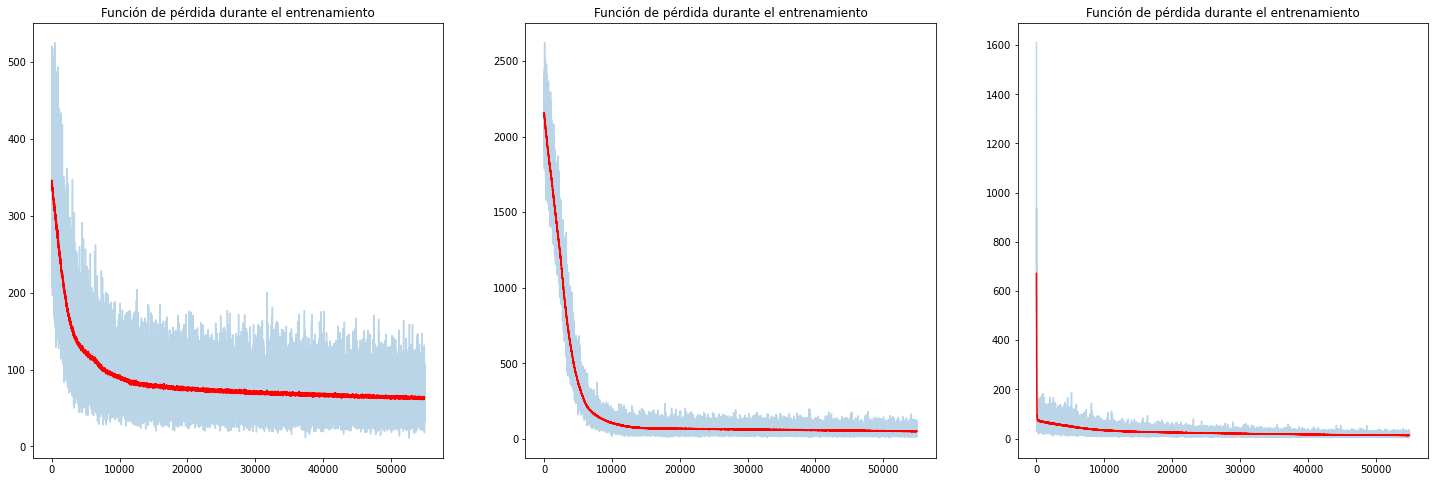

In [27]:
# Muestro la lista que contiene los valores de la función de pérdida
# y una versión suavizada (rojo) para observar la tendencia

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (25,8))

# Modelo 2 neuronas
ax[0].plot(loss_np_array_1, alpha = 0.3)
ax[0].plot(running_avg_loss_1, color='red')
ax[0].set_title("Función de pérdida durante el entrenamiento")

# Modelo 10 neuronas
ax[1].plot(loss_np_array_2, alpha = 0.3)
ax[1].plot(running_avg_loss_2, color='red')
ax[1].set_title("Función de pérdida durante el entrenamiento")

# Modelo 200 neuronas
ax[2].plot(loss_np_array_3, alpha = 0.3)
ax[2].plot(running_avg_loss_3, color='red')
ax[2].set_title("Función de pérdida durante el entrenamiento")

Text(0.5, 1.0, 'Perceptron 200 neuronas - Evaluacion')

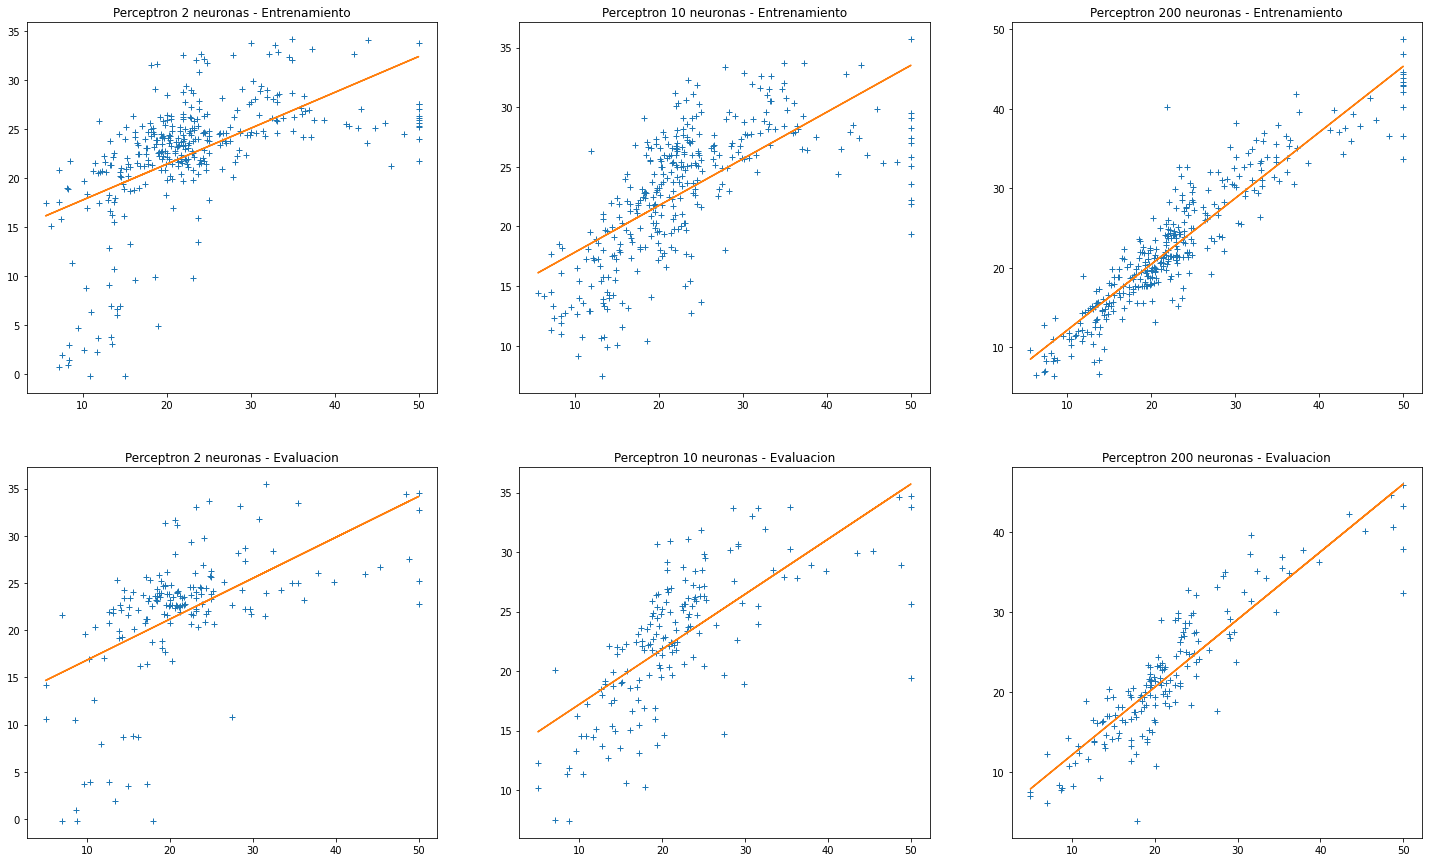

In [41]:
# Modelo 2 neuronas
# Train
py = model_1(torch.FloatTensor(X_train))
y_pred_train_1 = py.cpu().detach().numpy()
# Test
py = model_1(torch.FloatTensor(X_test))
y_pred_test_1 = py.cpu().detach().numpy()

# Modelo 10 neuronas
# Train
py = model_2(torch.FloatTensor(X_train))
y_pred_train_2 = py.cpu().detach().numpy()
# Test
py = model_2(torch.FloatTensor(X_test))
y_pred_test_2 = py.cpu().detach().numpy()


# Modelo 200 neuronas
# Train
py = model_3(torch.FloatTensor(X_train))
y_pred_train_3 = py.cpu().detach().numpy()
# Test
py = model_3(torch.FloatTensor(X_test))
y_pred_test_3 = py.cpu().detach().numpy()


fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (25,15))

################################################################################
# Graficos de entrenamiento

# Modelo de 2 neuronas
ax[0][0].plot(y_train, y_pred_train_1, '+')
X, Y = y_train.reshape(-1,1), y_pred_train_1.reshape(-1,1)
ax[0][0].plot( X, LinearRegression().fit(X, Y).predict(X))
ax[0][0].set_title('Perceptron 2 neuronas - Entrenamiento')

# Modelo de 10 neuronas
ax[0][1].plot(y_train, y_pred_train_2, '+')
X, Y = y_train.reshape(-1,1), y_pred_train_2.reshape(-1,1)
ax[0][1].plot( X, LinearRegression().fit(X, Y).predict(X))
ax[0][1].set_title('Perceptron 10 neuronas - Entrenamiento')

# Modelo de 200 neuronas
ax[0][2].plot(y_train, y_pred_train_3, '+')
X, Y = y_train.reshape(-1,1), y_pred_train_3.reshape(-1,1)
ax[0][2].plot( X, LinearRegression().fit(X, Y).predict(X))
ax[0][2].set_title('Perceptron 200 neuronas - Entrenamiento')
################################################################################
# Graficos de testeo

# Modelo de 2 neuronas
ax[1][0].plot(y_test, y_pred_test_1, '+')
X, Y = y_test.reshape(-1,1), y_pred_test_1.reshape(-1,1)
ax[1][0].plot( X, LinearRegression().fit(X, Y).predict(X))
ax[1][0].set_title('Perceptron 2 neuronas - Evaluacion')

# Modelo de 10 neuronas
ax[1][1].plot(y_test, y_pred_test_2, '+')
X, Y = y_test.reshape(-1,1), y_pred_test_2.reshape(-1,1)
ax[1][1].plot( X, LinearRegression().fit(X, Y).predict(X))
ax[1][1].set_title('Perceptron 10 neuronas - Evaluacion')

# Modelo de 200 neuronas
ax[1][2].plot(y_test, y_pred_test_3, '+')
X, Y = y_test.reshape(-1,1), y_pred_test_3.reshape(-1,1)
ax[1][2].plot( X, LinearRegression().fit(X, Y).predict(X))
ax[1][2].set_title('Perceptron 200 neuronas - Evaluacion')

In [42]:
mse_1_train = ((y_train - y_pred_train_1)**2).mean()
mse_1_test  = ((y_test - y_pred_test_1)**2).mean()
mse_2_train = ((y_train - y_pred_train_2)**2).mean()
mse_2_test  = ((y_test - y_pred_test_2)**2).mean()
mse_3_train = ((y_train - y_pred_train_3)**2).mean()
mse_3_test  = ((y_test - y_pred_test_3)**2).mean()

final_results = pd.DataFrame({
    'modelo': ['perceptron_2_neuronas', 'perceptron_10_neuronas', 'perceptron_200_neuronas'],
    'mse_train': [mse_1_train, mse_2_train, mse_3_train],
    'mse_test': [mse_1_test, mse_2_test, mse_3_test]

})

final_results

,modelo,mse_train,mse_test
0,perceptron_2_neuronas,62.768608,56.691776
1,perceptron_10_neuronas,50.187965,40.123947
2,perceptron_200_neuronas,12.882926,15.901195
